######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#4135c3">Trees, Random Forest, and Classifiers
<font color=darkblue>
<fr>
    
- Trees: Decision Tree, Tuned Decision Tree
- Classifiers: Bagging classfier, Tuned Bagging classifier, Adaboost Classifier, Gradient Boosting classifier, XGBoost Classifier, Tuned Adaboost Classifier, Gradient Boosting classifier with Adaboost, Tuned Gradient Boosting classifier, and Tuned XGBoost classifier
- Random Forest and Tuned Random Forest

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#54c335">Importing Python Libraries we need
<font color=darkblue>   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c335c3">Load and overview the dataset
<font color=darkblue>   

In [2]:
wine = pd.read_csv('/home/jayanthikishore/Downloads/ML_classwork/DT_RF_Ensemble/winequality.csv',sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# copying data to another varaible to avoid any changes to original data
data = wine.copy()

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c3bc35">Dataset explanation
<font color=darkblue>   

- Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)


1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

    
   12 - quality: score between 0 and 10 - Output variable (based on sensory data)


In [5]:
data.shape

(1599, 12)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#b5c335">Check the data types of the columns for the dataset.
<font color=darkblue>   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#8fc335">Any missing values in the data

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#60c335">Dataset summary

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#353cc3">Exploratory Data Analysis (EDA)
<font color=darkblue> 
- Univariate Analysis

In [9]:
def histo_bxplt(feature,clr, figsize=(8,6), bins = None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color=clr) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

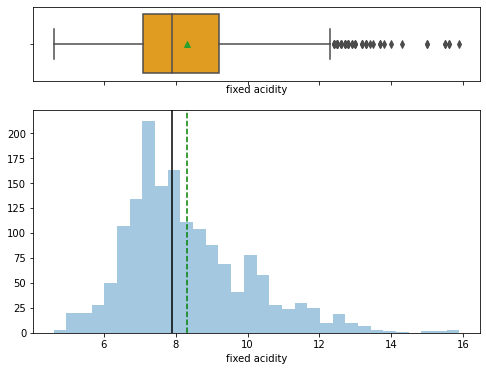

In [10]:
histo_bxplt(data['fixed acidity'],'orange')

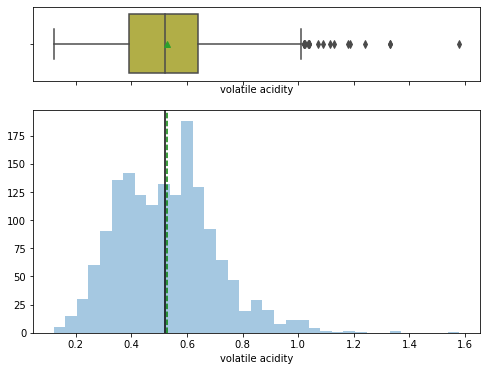

In [11]:
histo_bxplt(data['volatile acidity'],'#c3be35')

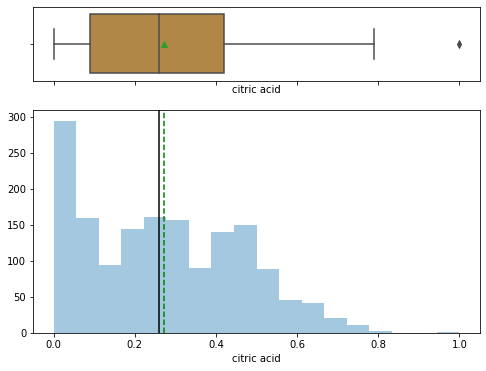

In [12]:
histo_bxplt(data['citric acid'],'#c38a35')

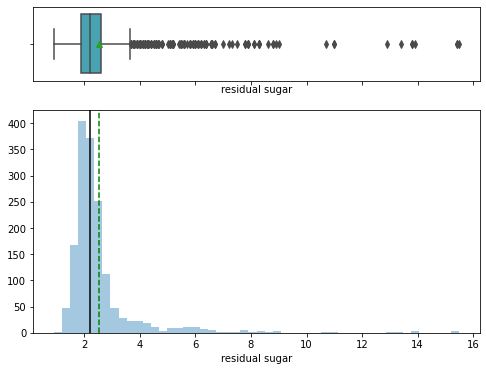

In [13]:
histo_bxplt(data['residual sugar'],'#35aec3')

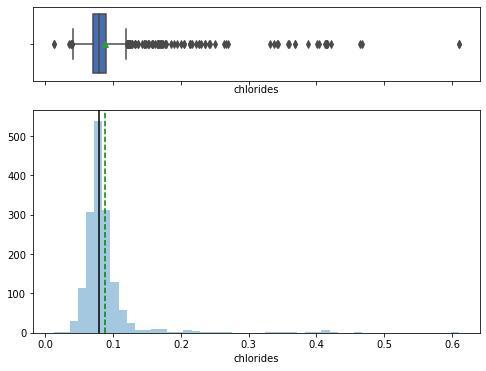

In [14]:
histo_bxplt(data['chlorides'],'#3569c3')

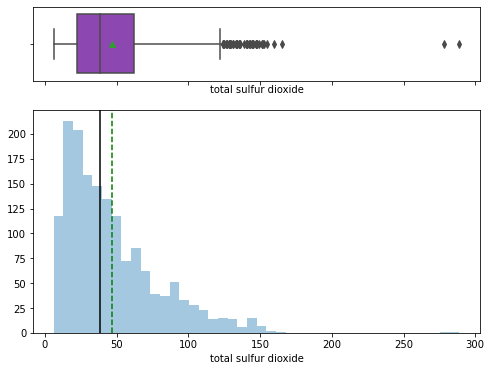

In [15]:
histo_bxplt(data['total sulfur dioxide'],'#9135c3')

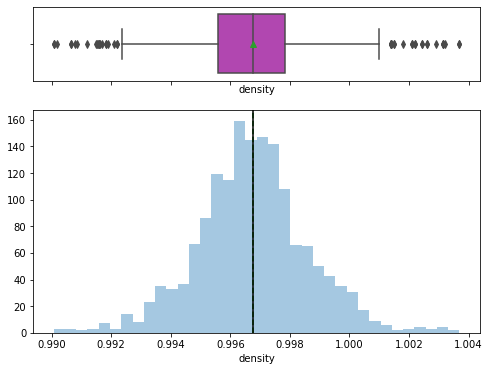

In [16]:
histo_bxplt(data['density'],'#c335c1')

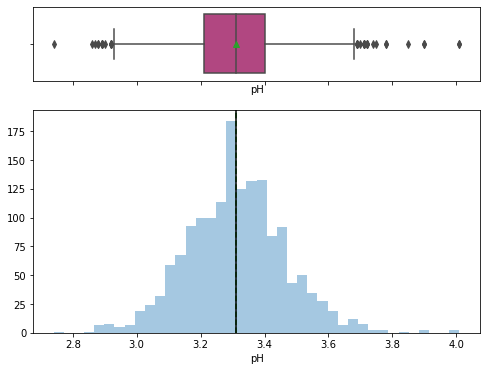

In [17]:
histo_bxplt(data['pH'],'#c33583')

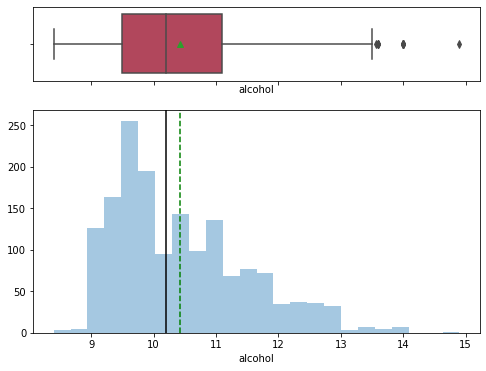

In [18]:
histo_bxplt(data['alcohol'],'#c33551')

In [19]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

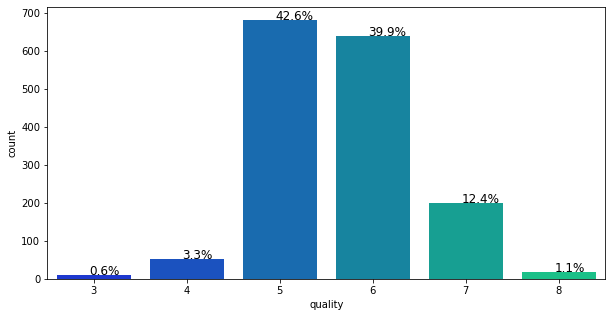

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["quality"],palette='winter')
perc_on_bar(ax,data["quality"])

* Most of the wines are rated either 5 or 6 out of 10.
* There are very less records for 3, 4, and 8 rated wines.
* To create a more balanced target variable we can combine records to create two broad categories - low quality wines and high quaity:  2-6 rating = low quality, 7-8 = high quality.

In [21]:
# defining bins
bins = (2, 6, 8)
# defining labels
labels = ['low', 'high']

data['quality_bins'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [22]:
data['quality_bins'].value_counts()

low     1382
high     217
Name: quality_bins, dtype: int64

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c335c3">Bivariate Analysis

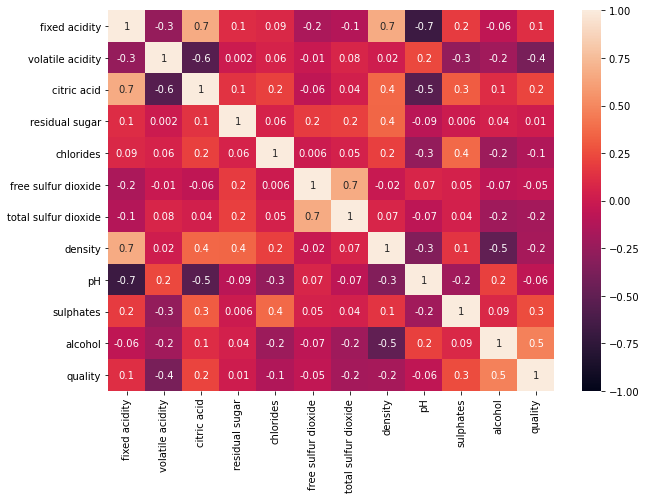

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* Fixed acidity has a strong correlation with citric acid and density.
* total sulphur dioxide and free sulfur dioxide have a strong correlation.
* quality shows a moderate correlaion with alcohol.

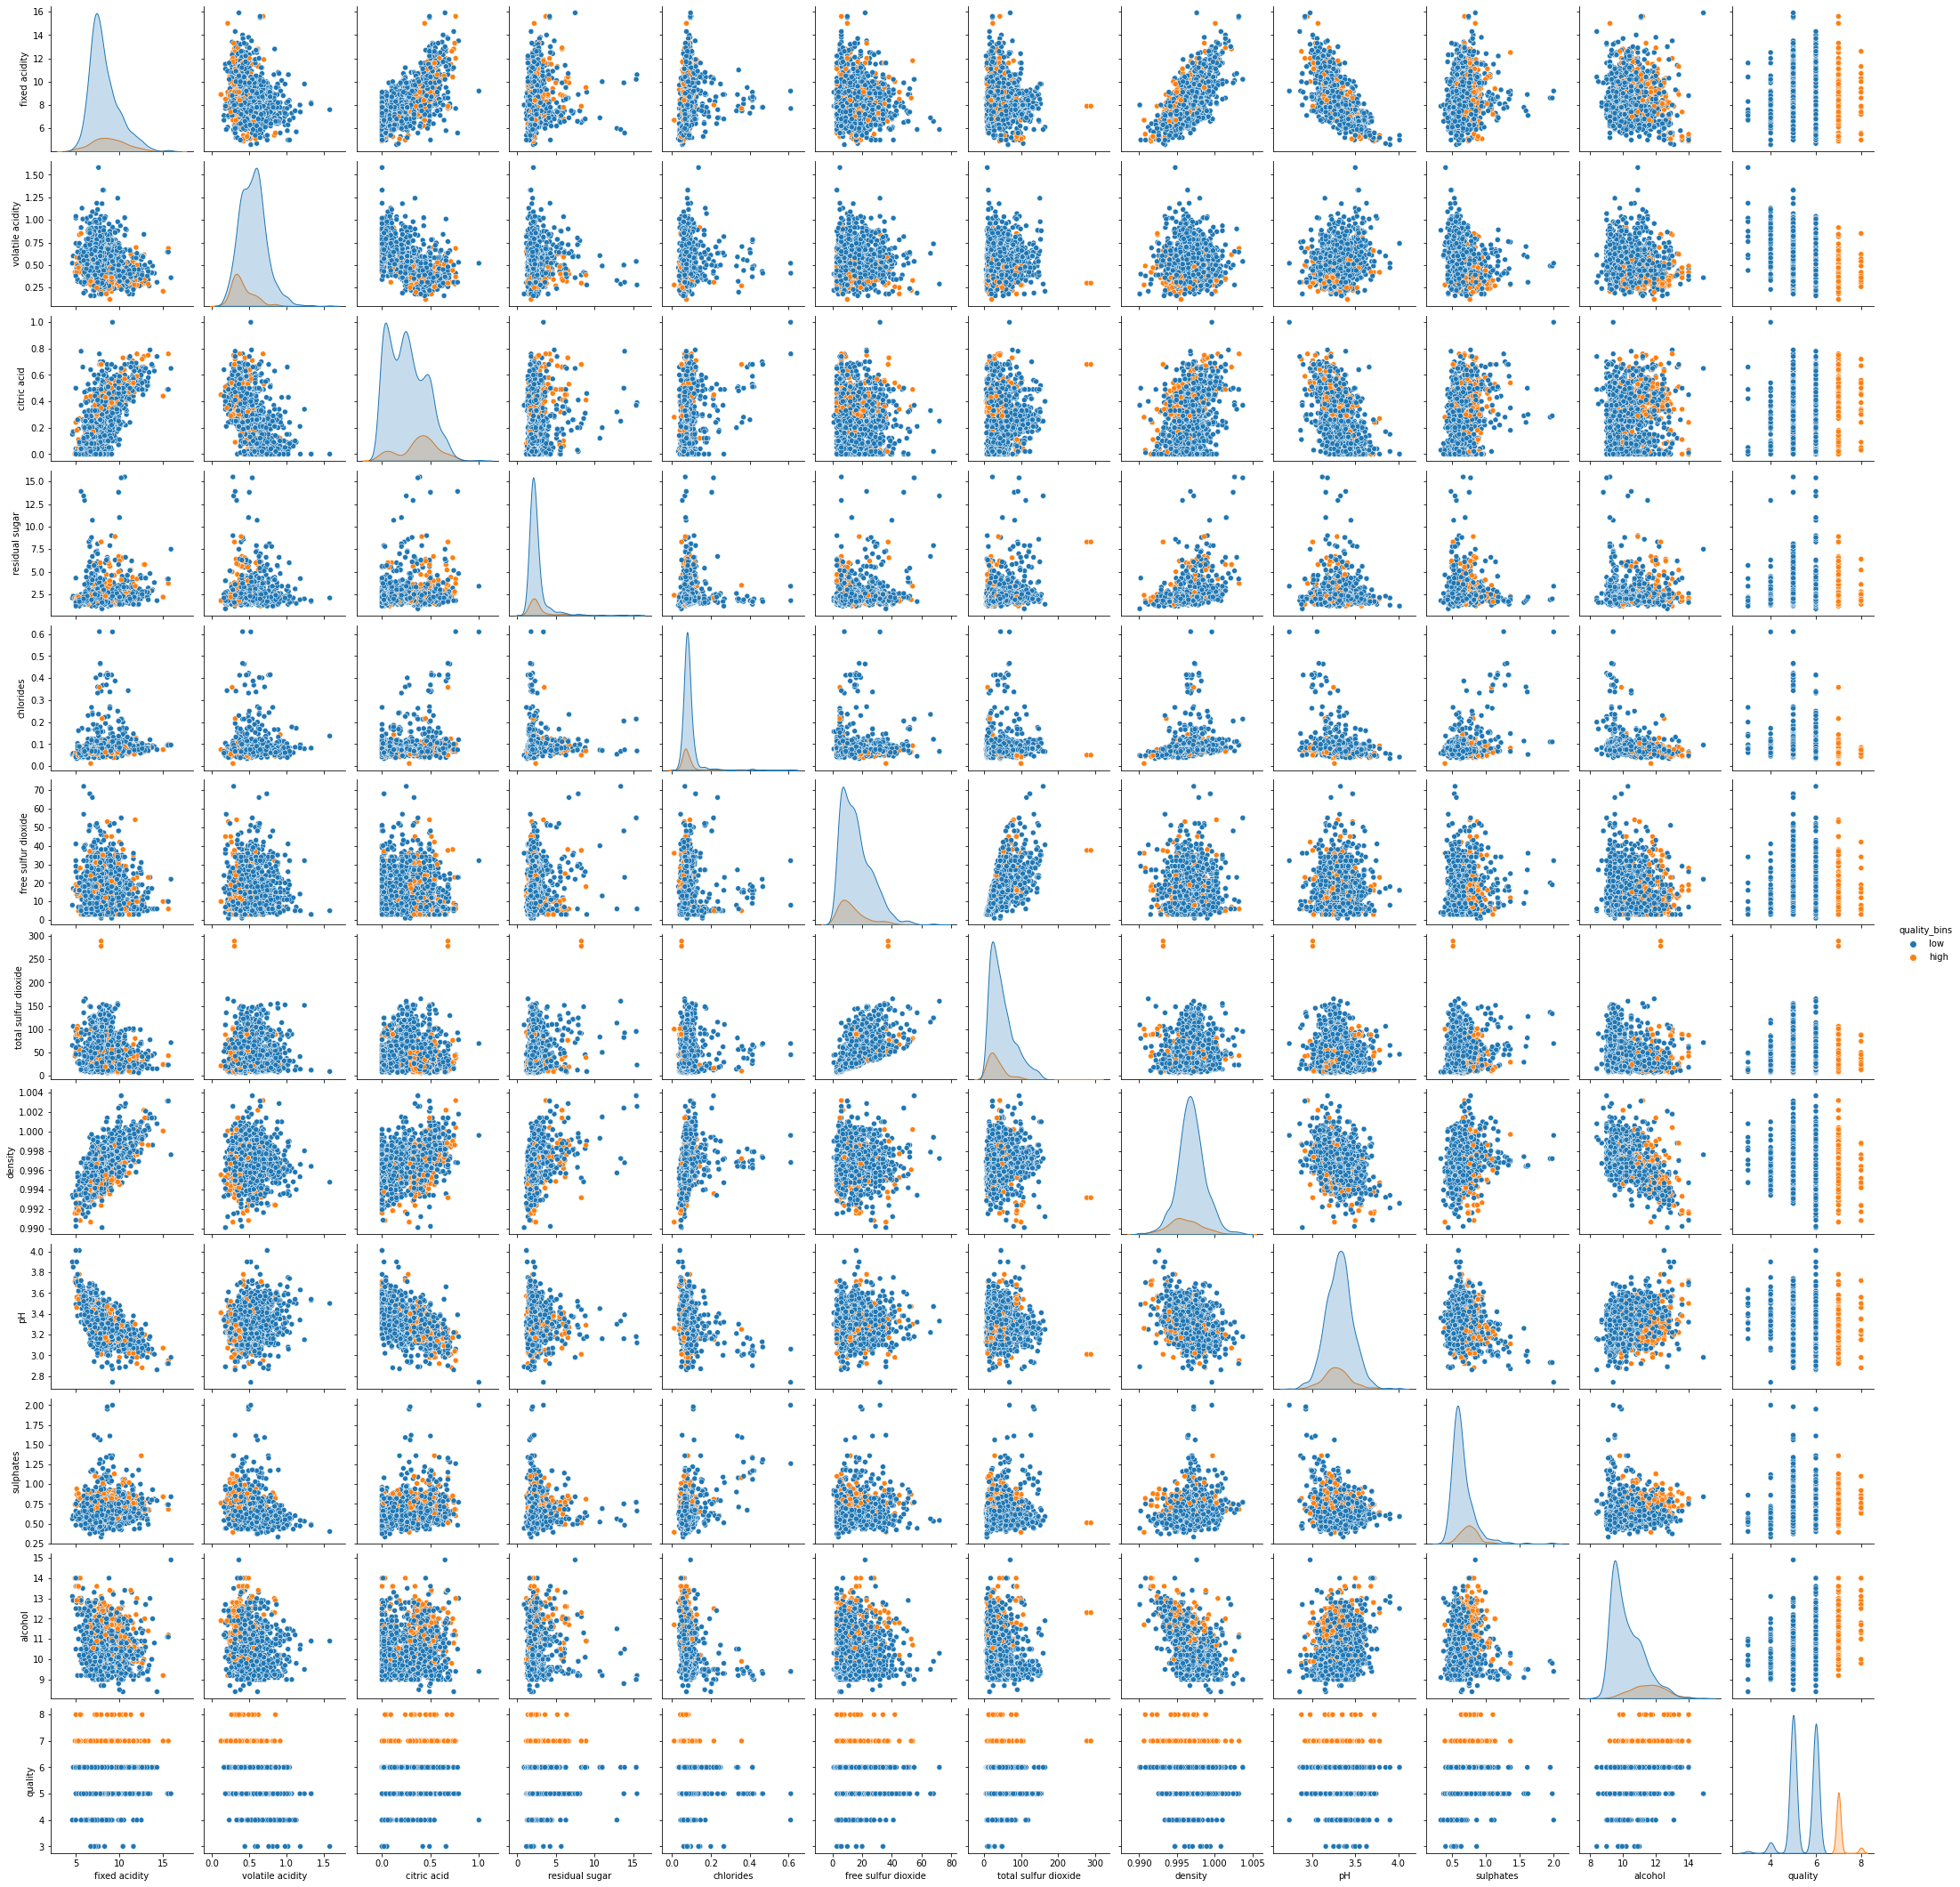

In [24]:
sns.pairplot(data,hue='quality_bins')
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c3c3">Quality vs acidity

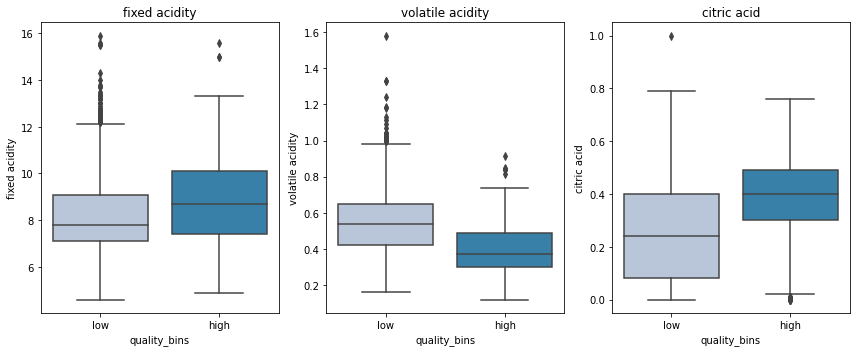

In [25]:
cols = data[['fixed acidity', 'volatile acidity', 'citric acid']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['quality_bins'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#43c335">Quality vs sulfur

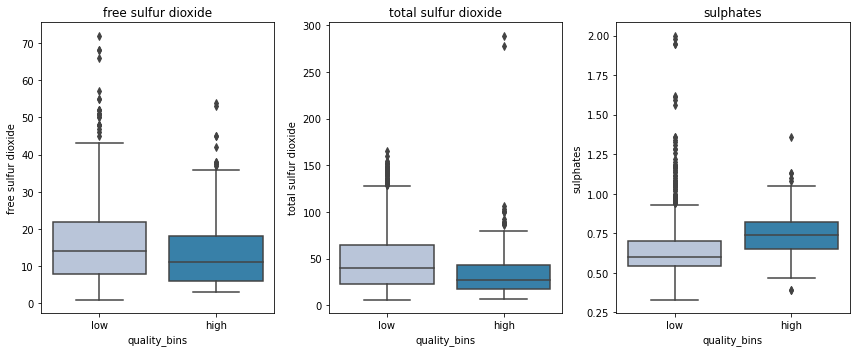

In [26]:
cols = data[['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['quality_bins'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

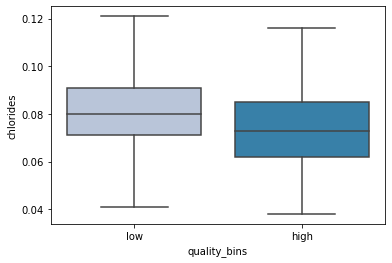

In [27]:
sns.boxplot(data['quality_bins'],data['chlorides'],showfliers=False,palette='PuBu');

In [28]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data['quality_bins'],x,palette="PuBu")
    plt.show()

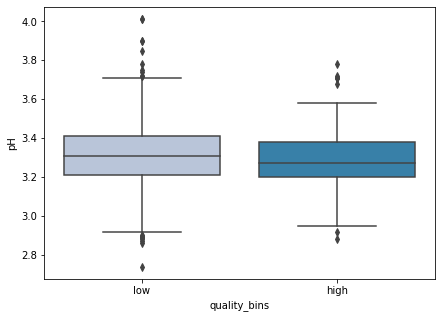

In [29]:
boxplot(data['pH'])

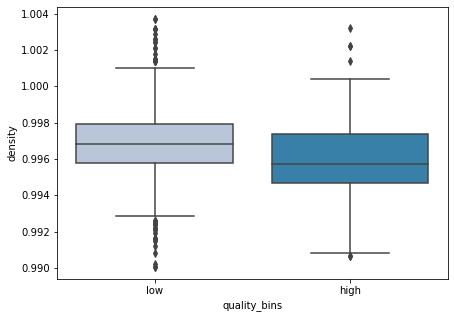

In [30]:
boxplot(data['density'])

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built  on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c335c3">Split data

In [31]:
X = data.drop(['quality_bins','quality'],axis=1)
y = data['quality_bins'].apply(lambda x : 0 if x=='low' else 1 )

In [32]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1119, 11) (480, 11)


In [33]:
y.value_counts(1)

0    0.86429
1    0.13571
Name: quality_bins, dtype: float64

In [34]:
y_test.value_counts(1)

0    0.864583
1    0.135417
Name: quality_bins, dtype: float64

In [35]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [36]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#c335c3">Decision Tree Classifier

In [37]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [38]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [39]:
dtree_acc = get_accuracy_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8875


In [40]:
y_predict = dtree.predict(X_test)

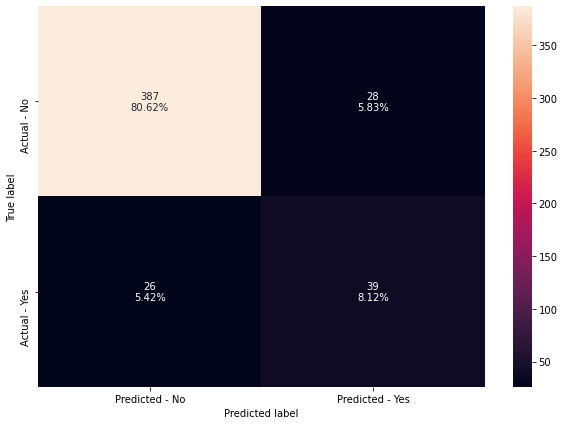

In [41]:
make_confusion_matrix(dtree,y_test)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#c335c3">Bagging Classifier

In [42]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [43]:
bagging_acc = get_accuracy_score(bagging)

Accuracy on training set :  0.9830205540661304
Accuracy on test set :  0.9166666666666666


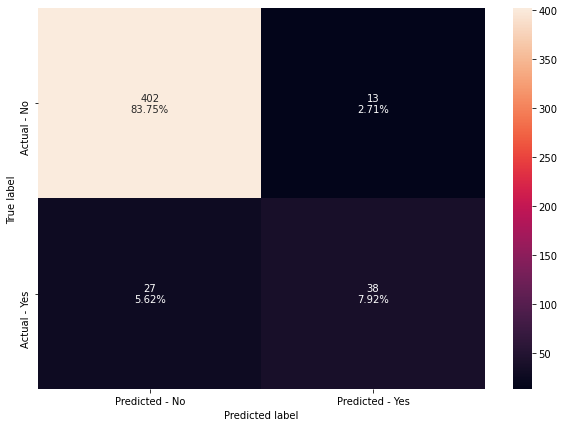

In [44]:
make_confusion_matrix(bagging,y_test)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#c335c3">Random Forest

In [45]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [46]:
rf_acc = get_accuracy_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9083333333333333


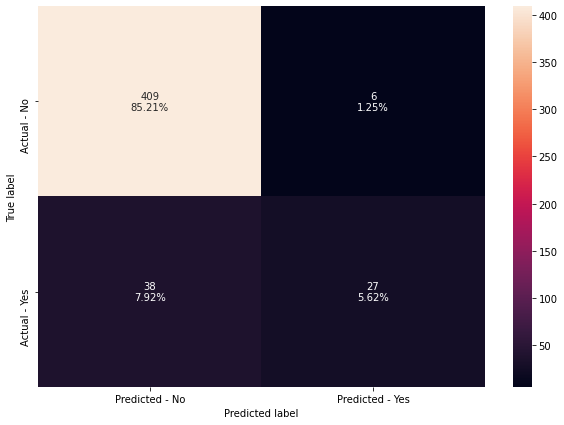

In [47]:
make_confusion_matrix(rf,y_test)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c335c3">Tuning Models
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#354ac3">Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.    


######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#354ac3">Tuning Decision Tree

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1]
             }


# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15,
                       min_impurity_decrease=1e-05, min_samples_leaf=5,
                       random_state=1)

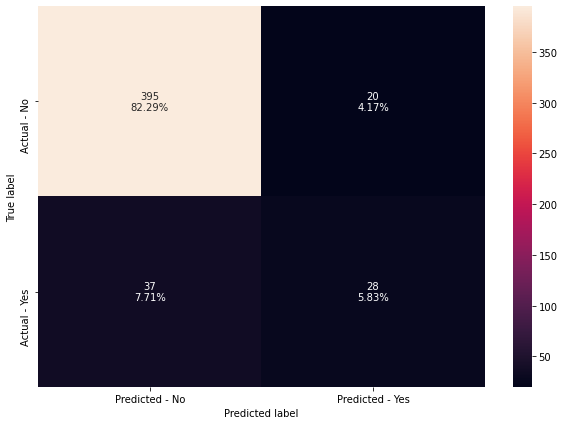

In [50]:
make_confusion_matrix(dtree_estimator,y_test)

In [51]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)

Accuracy on training set :  0.9249329758713136
Accuracy on test set :  0.88125


* Overfitting of decision tree has reduced and we have a generalized performance.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#8335c3">Tuning Bagging Classifier

In [52]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, cv = 5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]})

In [53]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

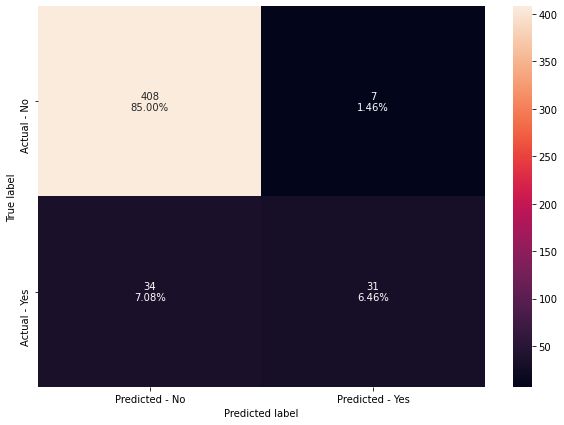

In [54]:
make_confusion_matrix(bagging_estimator,y_test)

In [55]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9145833333333333


* There is not much improvement in Bagging classifier.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#8335c3">Random Forest

In [56]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from
parameters = {  
                'max_features': ['sqrt','log2','auto'],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': list(np.linspace(10, 50, 10, dtype = int))}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=1)

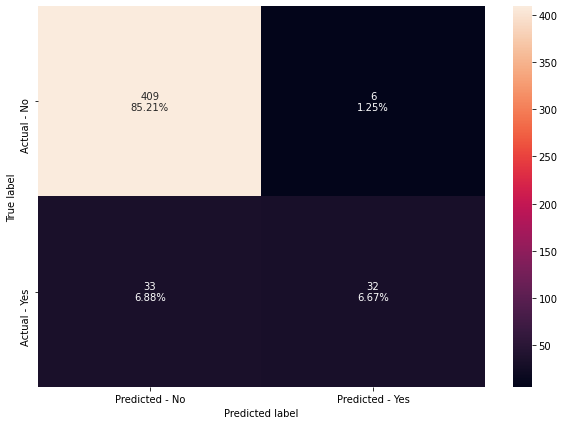

In [57]:
make_confusion_matrix(rf_estimator,y_test)

In [58]:
tuned_rf_acc = get_accuracy_score(rf_estimator)

Accuracy on training set :  0.9991063449508489
Accuracy on test set :  0.91875


* Overfitting is still there in Random Forest and the performance is equivalent to initial random forest model.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#35bcc3">AdaBoost Classifier

In [59]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

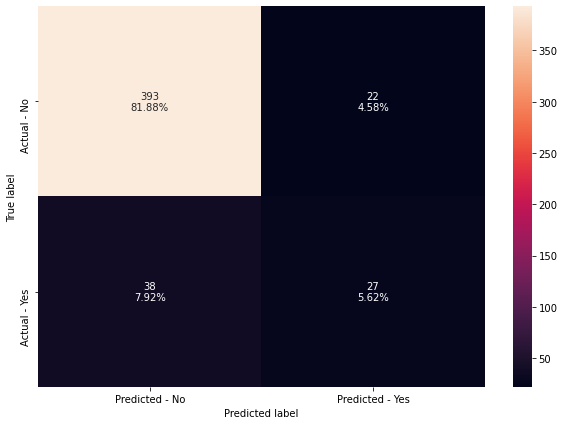

In [60]:
make_confusion_matrix(abc,y_test)

In [61]:
#Using above defined function to get accuracy on train and test set
abc_acc = get_accuracy_score(abc)

Accuracy on training set :  0.9133154602323503
Accuracy on test set :  0.875


* Adaboost classifier is giving a good and generalized performance on train and test.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#35c396">Gradient Boosting Classifier

In [62]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

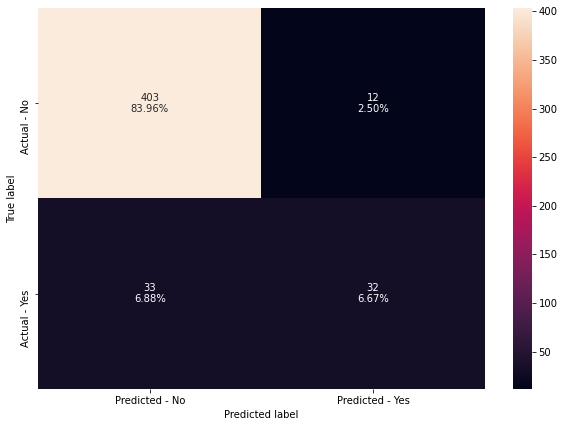

In [63]:
make_confusion_matrix(gbc,y_test)

In [64]:
#Using above defined function to get accuracy on train and test set
gbm_acc = get_accuracy_score(gbc)

Accuracy on training set :  0.9696157283288651
Accuracy on test set :  0.90625


* Gradient boosting classifier is giving a good and generalized performance on train and test.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#a7c335">XGBoost Classifier

In [65]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

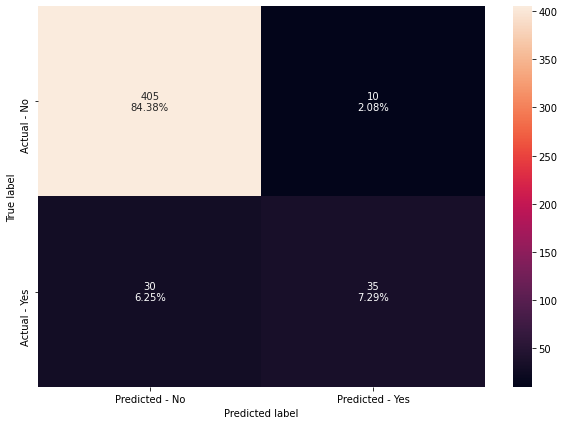

In [66]:
make_confusion_matrix(xgb,y_test)

In [67]:
#Using above defined function to get accuracy on train and test set
xgb_acc = get_accuracy_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9166666666666666


* XGBoost is performing well on data but there's overfitting.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c335c3">Hyperparameter Tuning
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#354ac3">AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.


In [68]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=70, random_state=1)

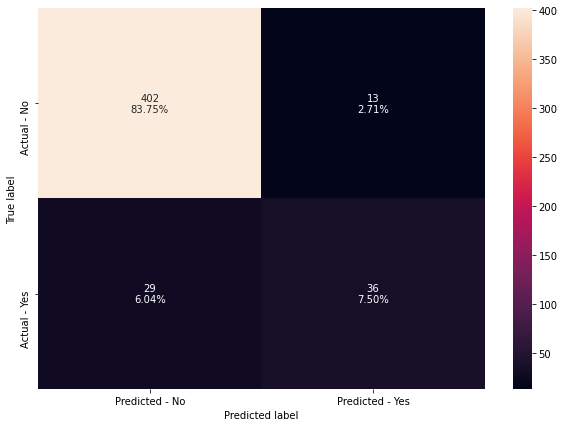

In [69]:
make_confusion_matrix(abc_tuned,y_test)

In [70]:
#Using above defined function to get accuracy on train and test set
tuned_abc_acc = get_accuracy_score(abc_tuned)

Accuracy on training set :  0.9910634495084897
Accuracy on test set :  0.9125


######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#354ac3">Gradient Boosting Classifier
    
- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.
    
**Let's try using AdaBoost classifier as the estimator for intial predictions**

In [71]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

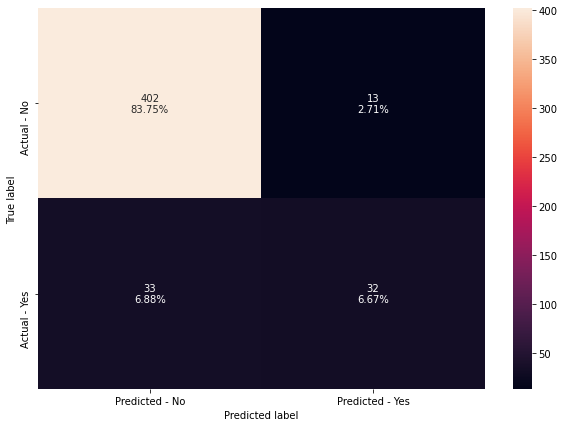

In [72]:
make_confusion_matrix(gbc_init,y_test)

In [73]:
#Using above defined function to get accuracy on train and test set
gbc_acc_init = get_accuracy_score(gbc_init)

Accuracy on training set :  0.9615728328865059
Accuracy on test set :  0.9041666666666667


* Gradient boosting with Adaboost as base estimator has given good results.

In [74]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

In [75]:
#Using above defined function to get accuracy on train and test set
tuned_gbc = get_accuracy_score(gbc_tuned)

Accuracy on training set :  0.9937444146559428
Accuracy on test set :  0.9145833333333333


* After tuning Gradient boost we have increased the accuracy by 1%  on test set.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#354ac3">XGBoost Classifier
    
**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.

In [76]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [77]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

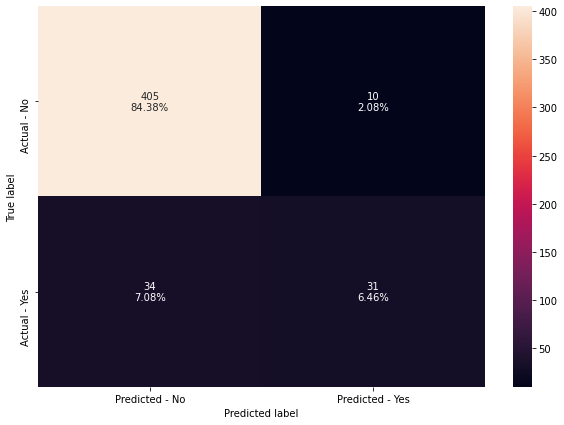

In [78]:
make_confusion_matrix(xgb_tuned,y_test)

In [79]:
#Using above defined function to get accuracy on train and test set
tuned_xgb_acc = get_accuracy_score(xgb_tuned)

Accuracy on training set :  0.9910634495084897
Accuracy on test set :  0.9083333333333333


* There's not much difference in the results of XGBoost after tuning as compared to the initial XGBoost model.

### Comparing all the models

In [80]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_estimator,rf,rf_estimator,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned]
# defining empty lists to add train and test results
acc_train = []
acc_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

In [81]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest','Adaboost Classifier',
                                          'Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy
0,Decision Tree,1.000000,0.887500
1,Tuned Decision Tree,0.924933,0.881250
2,Bagging Classifier,0.983021,0.916667
3,Tuned Bagging Classifier,1.000000,0.914583
4,Random Forest,1.000000,0.908333
5,Tuned Random Forest,0.999106,0.918750
6,Adaboost Classifier,0.913315,0.875000
7,Gradient Boosting Classifier,0.969616,0.906250
8,XGBoost classifier,1.000000,0.916667
9,Tuned Adaboost Classifier,0.991063,0.912500


* All model have performed well on training data and have been able to give similar performance on test data to some extent.
* Gradient Boosting classifier however has given the most generalized performance among all the other models.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#354ac3">Feature importance of Gradient Boosting Classifier

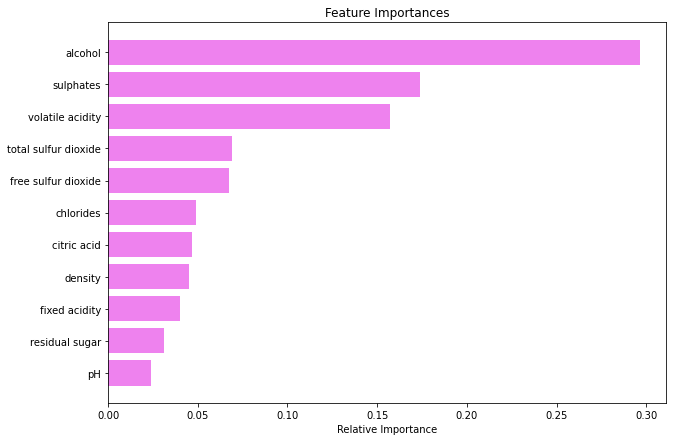

In [82]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Alcohol, Sulphate and volatile acidity are the three most important features to predict the Wine Quality.

### Conclusion-
A highly rated wine has following features in comparison to the low rated wines - 
* Higher concentration of alcohol.
* A fairly higher concentration of sulphates
* Less volatile acidity
* Higher fixed acidity.
* Higher citric acid concentration.
* Fair concentration of total suphur dioxide and free sulphur dioxide.
* Less chlorides, density and pH levels.
